In [27]:
from constants import ERA5_BEST_INFERENCE_WANDB_RUN_IDS
from utils import wandb_to_beaker_result, beaker_to_xarray
import xarray as xr
import matplotlib.pyplot as plt
xr.set_options(keep_attrs=True)
plt.rcParams['figure.dpi'] = 300

In [2]:
wandb_id = ERA5_BEST_INFERENCE_WANDB_RUN_IDS["80yr"]
beaker_dataset_id = wandb_to_beaker_result("ace2", wandb_id)

In [3]:
ds_pred = beaker_to_xarray(beaker_dataset_id, "monthly_mean_predictions.nc")
ds_target = beaker_to_xarray(beaker_dataset_id, "monthly_mean_target.nc")
ds_pred = ds_pred.isel(time=slice(None, -2)).isel(sample=0)
ds_target = ds_target.isel(time=slice(None, -2)).isel(sample=0)
# since only have one ensemble member, can use richer valid_time as time
# instead of requiring scalar time
ds_pred['time'] = ds_pred['valid_time']
ds_target['time'] = ds_target['valid_time']

Output()

Output()

In [12]:
ds = xr.concat(
    [
        ds_target.assign_coords(source="target"),
        ds_pred.assign_coords(source="pred")
    ],
    dim="source"
)

In [13]:
ds_zm = ds.mean(dim='lon')

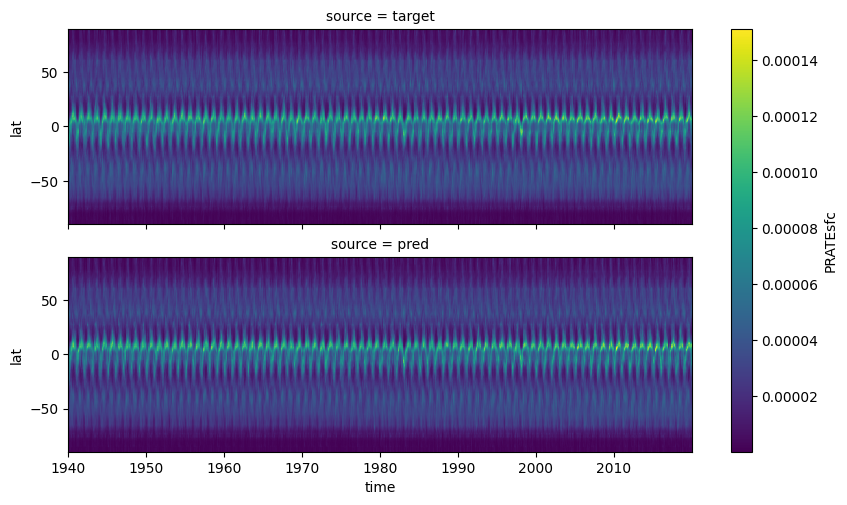

In [26]:
fg = ds_zm.PRATEsfc.plot(row='source', x='time')
fg.fig.set_size_inches(10, 5)

Text(0.5, 1.0, 'Mean 2001 - 2010')

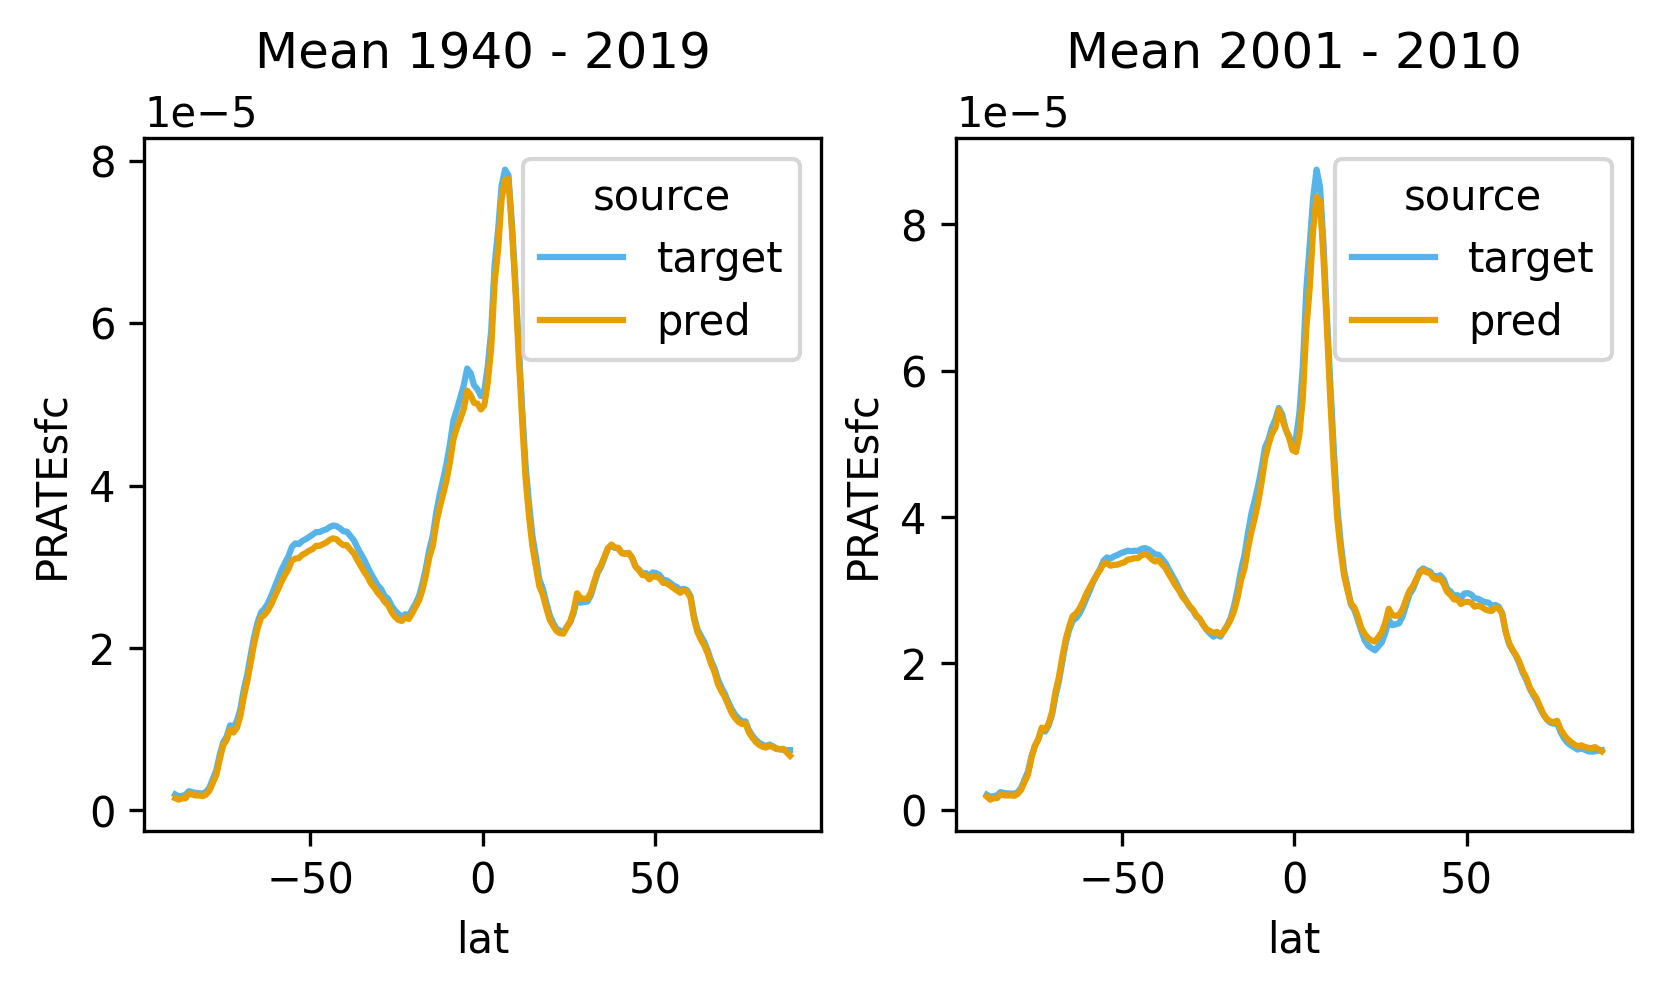

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(6.4, 3))
ds_zm.PRATEsfc.mean('time').plot(ax=axes[0], hue='source')
ds_zm.PRATEsfc.sel(time=slice('2001', '2010')).mean('time').plot(ax=axes[1], hue='source')
axes[0].set_title('Mean 1940 - 2019')
axes[1].set_title('Mean 2001 - 2010')

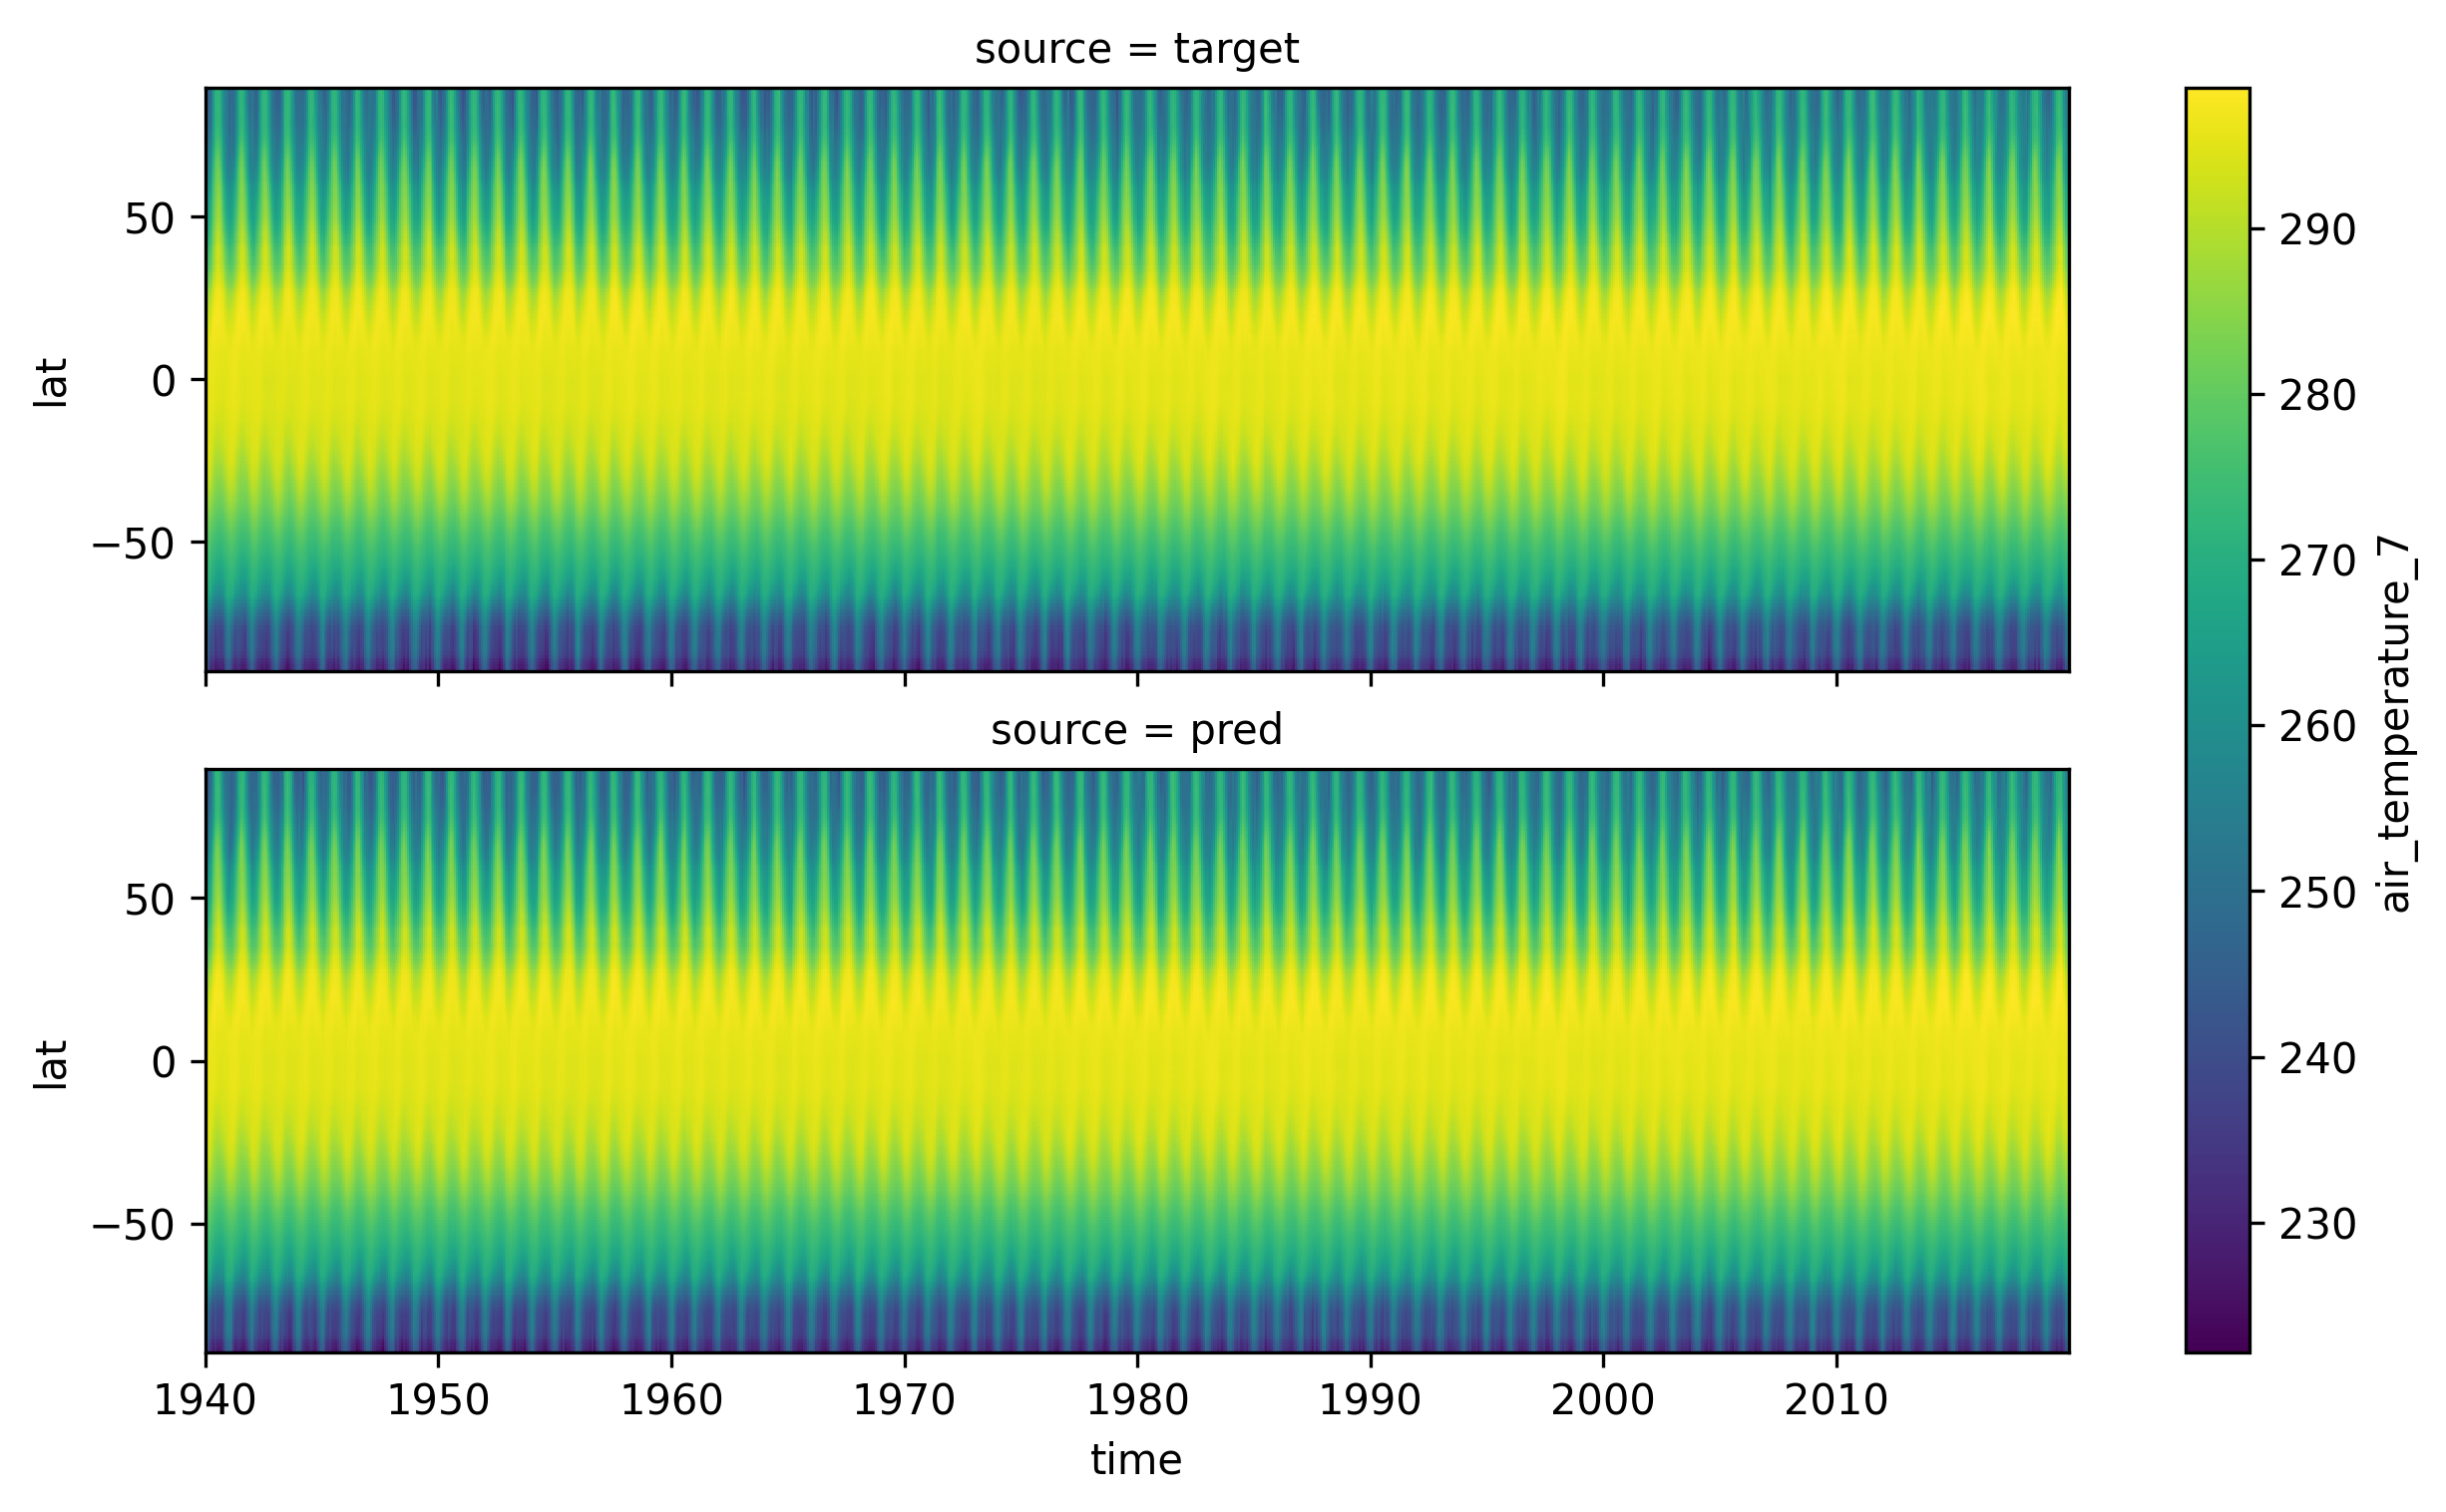

In [32]:
fg = ds_zm.air_temperature_7.plot(row='source', x='time')
fg.fig.set_size_inches(10, 5)

Text(0.5, 1.0, 'Level-0 zonal mean zonal wind, 5S - 5N')

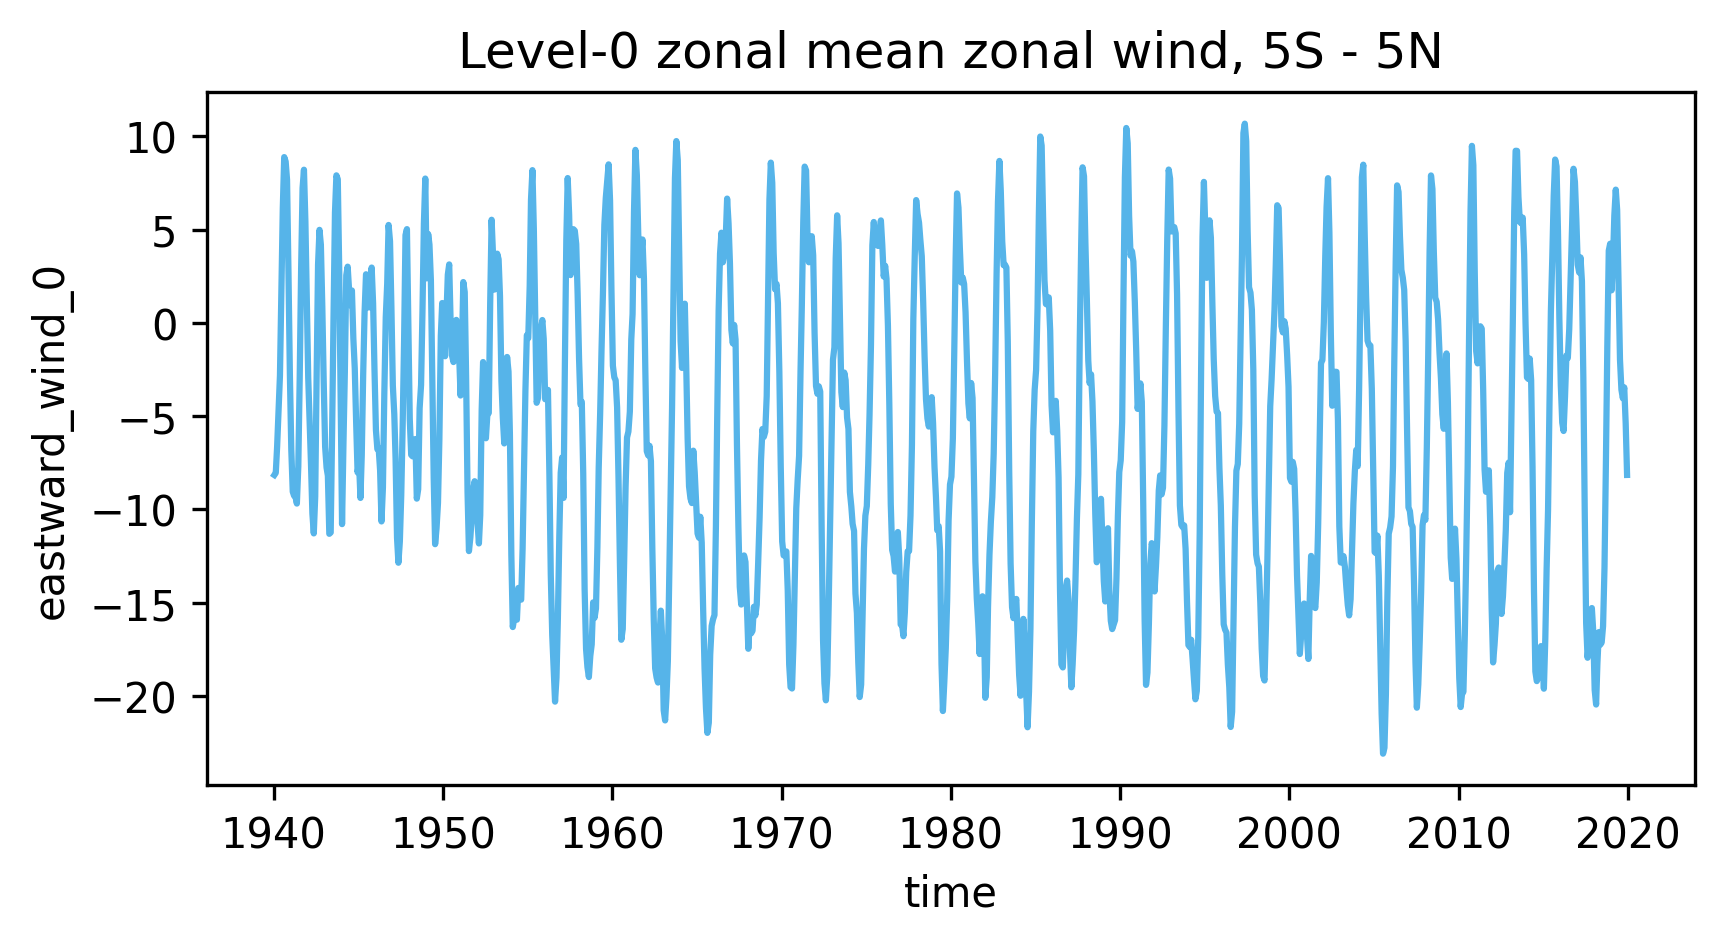

In [42]:
qbo = ds_zm.eastward_wind_0.sel(lat=slice(-5, 5)).mean('lat')
fig, ax = plt.subplots(1, 1, figsize=(6.4, 3))
qbo.sel(source='target').plot(ax=ax, hue='source', x='time')
ax.set_title('Level-0 zonal mean zonal wind, 5S - 5N')

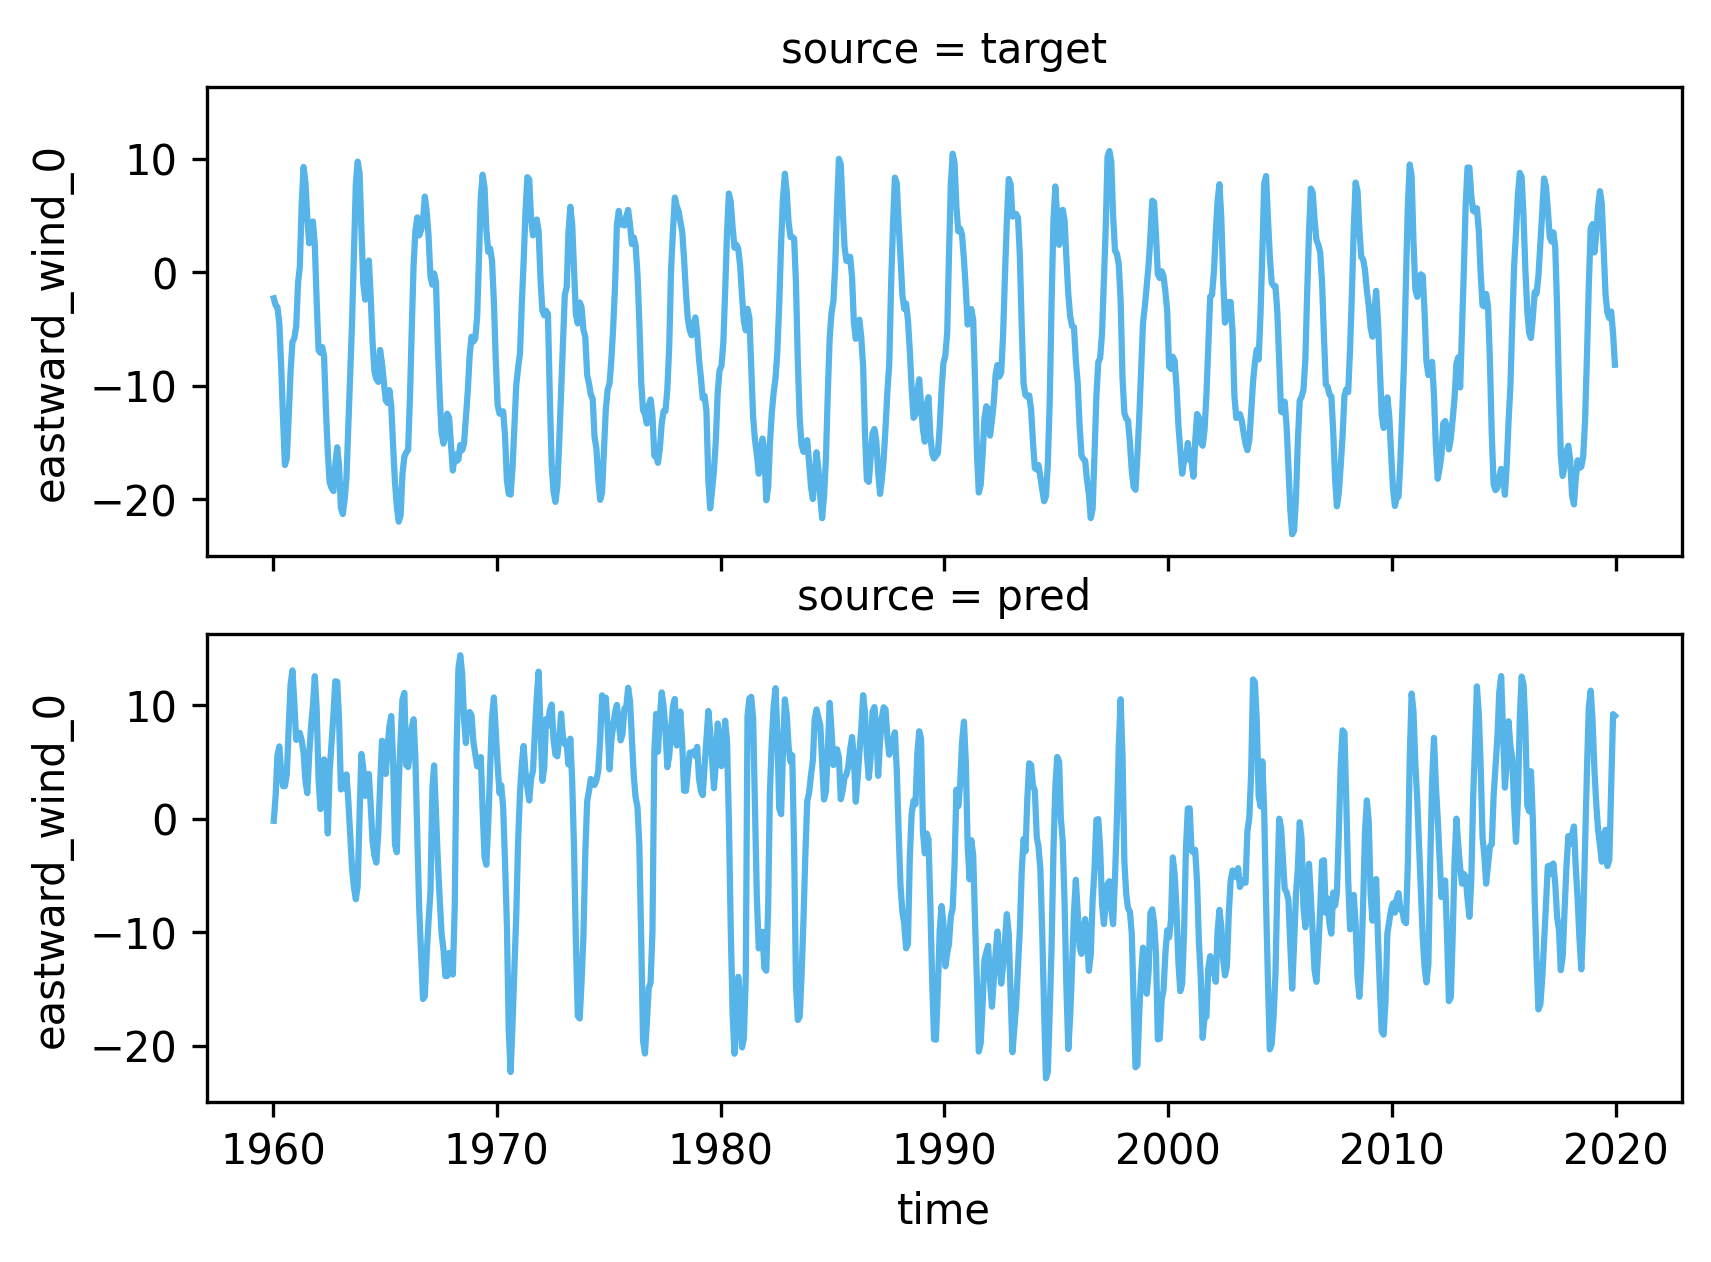

In [48]:
fg = qbo.sel(time=slice('1960', '2020')).plot(row='source', x='time')
fg.fig.set_size_inches(6.4, 4)

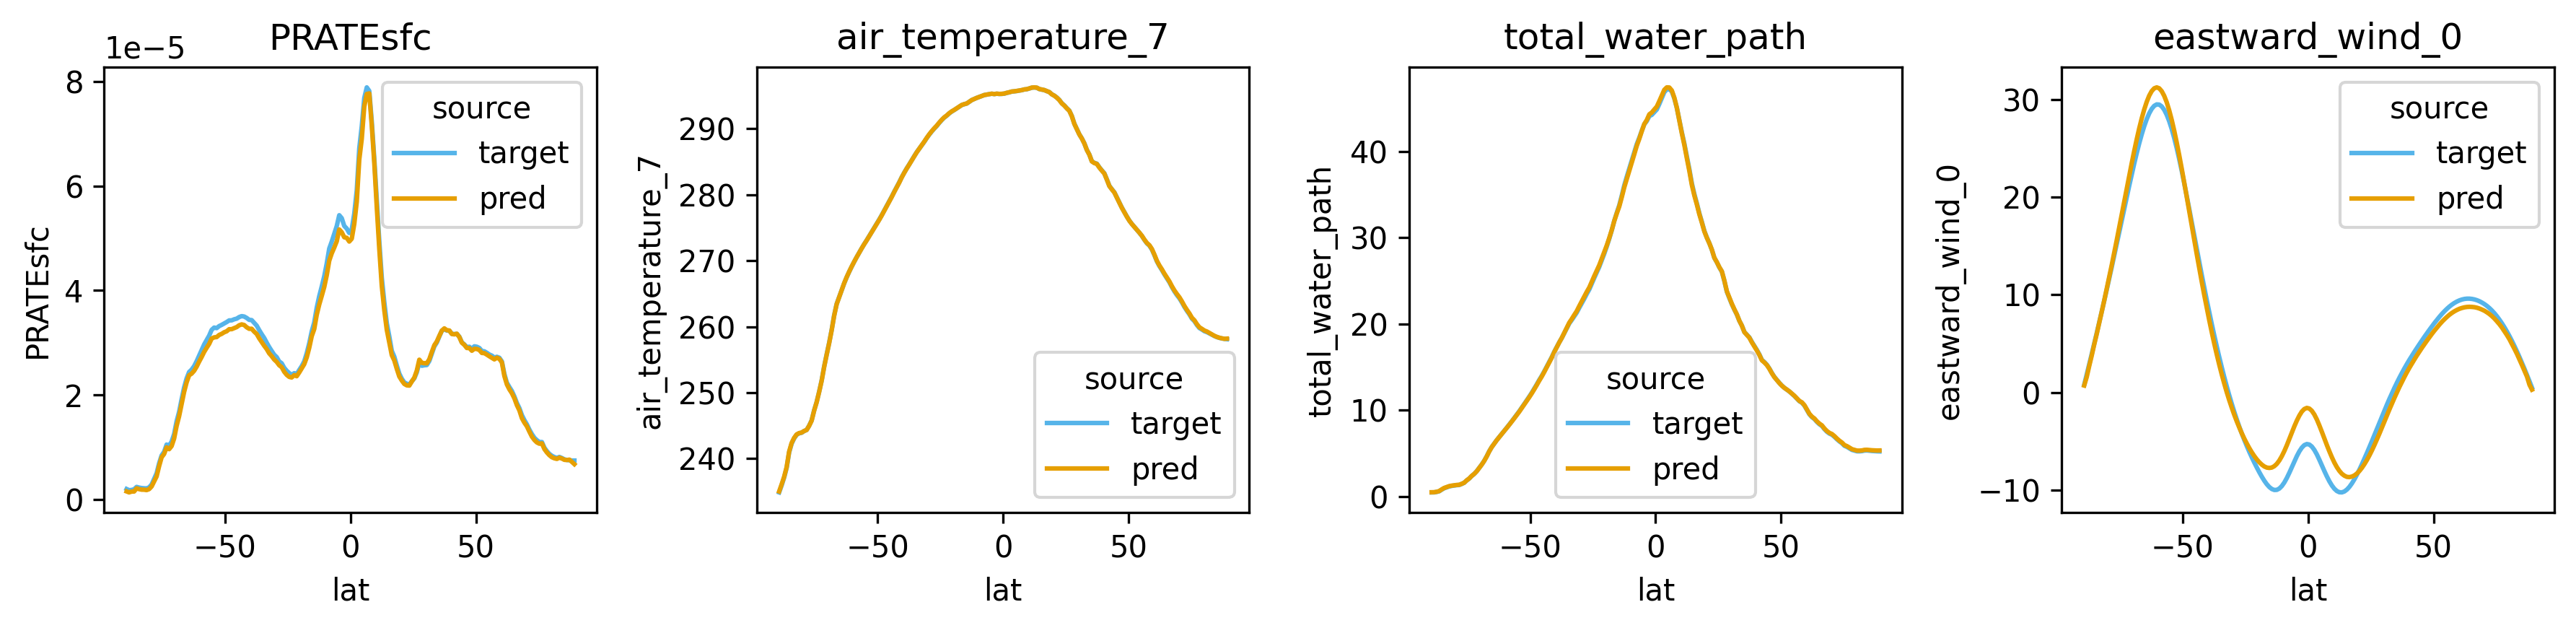

In [61]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
names = ['PRATEsfc', 'air_temperature_7', 'total_water_path', 'eastward_wind_0']
for i, name in enumerate(names):
    ds_zm[name].mean('time').plot(ax=axes[i], hue='source')
    axes[i].set_title(name)
fig.tight_layout()

In [ ]:
ds